## Breakout 1: AY250 Fall 2013 - Python for Data Science - Machine Learning ##

<img src="http://l1.yimg.com/bt/api/res/1.2/VRpMGylj..sbchEH8mKCmg--/YXBwaWQ9eW5ld3M7Zmk9ZmlsbDtoPTQyMTtweG9mZj01MDtweW9mZj0wO3E9ODU7dz03NDk-/http://media.zenfs.com/en_us/News/ap_webfeeds/6ebbfa2b3ecb56203e0f6a706700c38e.jpg" width=80%>

You're going to help Team USA win the <a href="http://www.thedailysail.com/inshore/13/65151/1/looking-ahead-to-the-35th-americas-cup">next America's cup</a> by making a predictive model to determine the resistance of a boat given it's geometry and speed. This is usually only measureable with advanced simulations but we can get <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">7-dimensional data to build a model</a> and then determine this value for arbitary new boat design:

<ul>
<li> *Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the ship's performance and for estimating the required propulsive power. Essential inputs include the basic hull dimensions and the boat velocity.  The Delft data set comprises 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose. These experiments include 22 different hull forms...*
</ul>


Variations concern hull geometry coefficients and the Froude number: 

1. Longitudinal position of the center of buoyancy. 
2. Prismatic coefficient. 
3. Length-displacement ratio. 
4. Beam-draught ratio. 
5. Length-beam ratio. 
6. Froude number. 

The measured variable is the residuary resistance per unit weight of displacement: 

7. Residuary resistance per unit weight of displacement, adimensional. 

In [1]:
import urllib2
from StringIO import StringIO
dat_file = urllib2.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data")
data = StringIO(dat_file.read())

### load scikit learn libraries

In [150]:
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
from sklearn import grid_search
from pandas.tools.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [2]:
%pylab inline
d = np.loadtxt(data)
np.random.shuffle(d)  # shuffle the instances since it appears to be ordered

Populating the interactive namespace from numpy and matplotlib


### a. Chunk the data into the variable you are going to predict (and call that vector Y). Split into a training set with 90% of the complete data and 10% testing set. Be sure to scale the feature data.

In [4]:
d.shape

(308, 7)

In [5]:
Y = d[:, 6]

In [7]:
X = d[:, :6]

In [43]:
colNames = ["X{0}".format(i) for i in range(6)]

split the data set into training and test set

In [17]:
train_ix = int(308 * 0.9)
test_ix = Y.shape[0] - train_ix  

In [61]:
X_scaled = preprocessing.scale(X, axis=0)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.1, random_state=5)

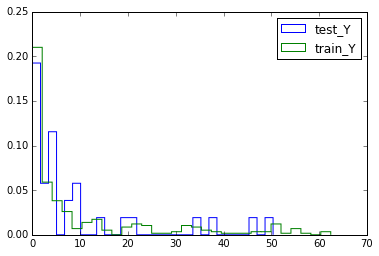

In [127]:
_, _, _ = plt.hist(test_Y, histtype='step', label="test_Y", normed=True,
                   bins=30)
_, _, _ = plt.hist(train_Y, histtype='step', label="train_Y", normed=True,
                  bins=30)
plt.legend(loc='best')

looks ok ... in terms of the split of the data

## scale the data

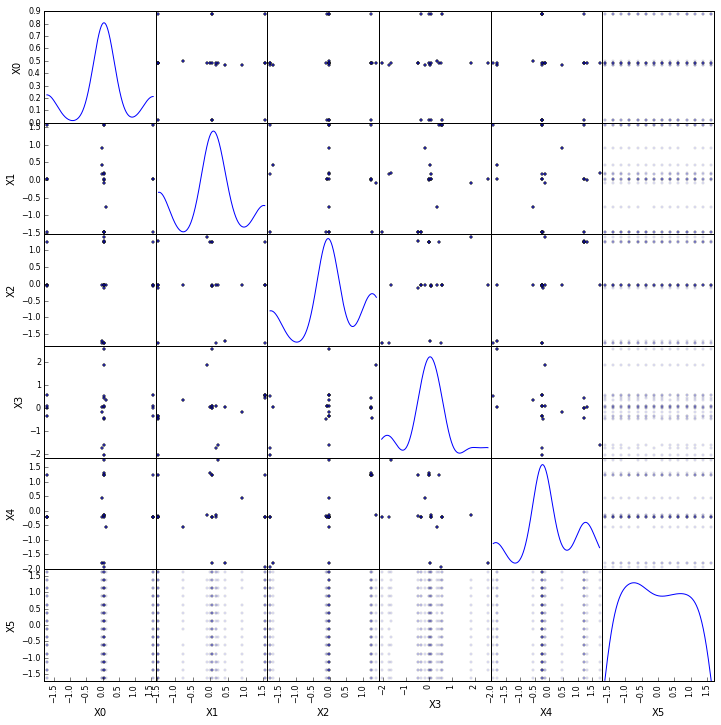

In [128]:
train_scaled_df = pd.DataFrame(X_train, columns=colNames)
_ = scatter_matrix(train_scaled_df, alpha=0.1, diagonal='kde',
                   figsize=(12, 12))

### b. Learn/fit a kNR model with k=5

In [129]:
X_train.shape

(277, 6)

In [130]:
X_test.shape

(31, 6)

In [136]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=2, p=2, weights='uniform')

In [137]:
neigh.score(X_train, y_train)

0.93538312351766539

In [138]:
clf = grid_search.GridSearchCV(neigh, {"n_neighbors": range(1, 7)})
clf.fit(X_train, y_train)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=2, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [139]:
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [143]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [144]:
neigh.score(X_test, y_test)

0.78534182579603162

In [146]:
y_predict =neigh.predict(X_test)

### c. Determine the mean_squared error of the result

In [147]:
metrics.mean_squared_error(y_test, y_predict)

55.504812903225819

### d. What MSE would we expect from (naively) guessing the mean of the training data?

In [149]:
y_naive = np.mean(y_train) * np.ones(len(y_test))

metrics.mean_squared_error(y_test, y_naive)

258.8630286199986

### e. If time, try to be a RandomForestRegressor model. How did you do?

In [175]:
clf = RandomForestRegressor(n_estimators=1000, max_features=4,
                            oob_score=True)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features=4,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=None, verbose=0)

In [176]:
clf.score(X_train, y_train)

0.99928688739915916

In [177]:
y_predict = clf.predict(X_test)

In [178]:
metrics.mean_squared_error(y_test, y_predict)

3.39912537431946

(c) J. Bloom (UC Berkeley) 2013